In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib,sys,os,json,h5py
# from cupy.fft import rfft2,irfft2
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
mpl.rc("text", usetex = True)

In [2]:
paramfile = '/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/parameters.json'
with open(paramfile,'r') as jsonFile: params = json.load(jsonFile)

d = params["d"] # Dimension
nu =params["nu"] # Viscosity
Re = 1/nu if nu > 0 else np.inf # Reynolds number
N = Nx = Ny = params["N"] # Grid size
dt = params["dt"] # Timestep
T = params["T"] # Final time
alph = params["alph"] # Density of the particles
eta = params["eta"]/(Nx//3) # Desired Kolmogorov length scale
Nprtcl = params["Nprtcl"] # Number of particles
tf = params["tf"] # Kolmogorov timescale
st = params["st"]*tf # Particle Stokes number
linnu = params["linnu"] # Linear viscosity
order = params["order"] # Order of the scheme

In [3]:
savePlot = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/Plots/Re_{np.round(Re,2)},dt_{dt},N_{N}/")
savePlot.mkdir(parents=True, exist_ok=True)
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
loadPath.exists()

True

In [4]:
alpha_values = [0.7,0.77,0.8,0.83,0.85,0.9,0.95]

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean

/tmp/ipykernel_29474/2258929581.py:11: RuntimeWarning: invalid value encountered in true_divide
  ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')


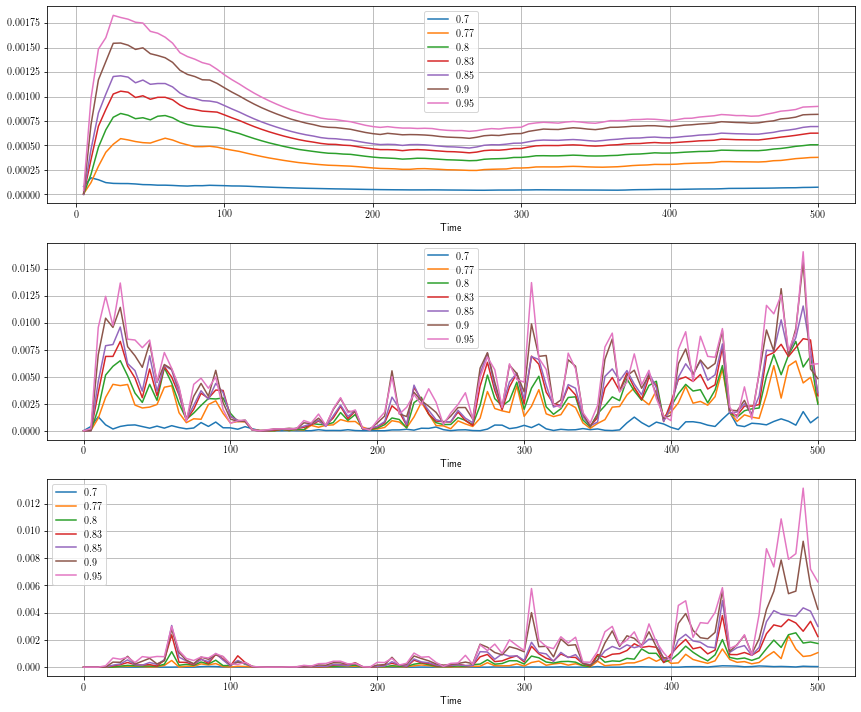

In [5]:
fig,ax = plt.subplots(3,1,figsize=(12,10))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.tick_params(axis='y', labelsize=20)
    
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].legend()
    ax[i].grid()
    # ax.set_ylim(-0.015,0.005)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean

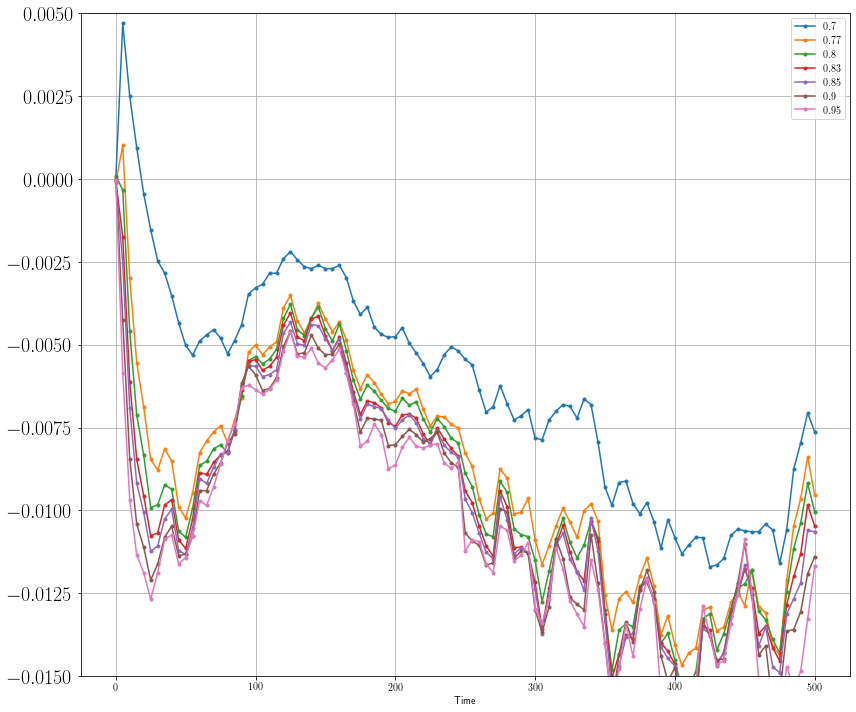

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
        ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        ax.tick_params(axis='y', labelsize=20)
    
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(1):
    ax.set_xlabel('Time')
    ax.legend()
    ax.grid()
    ax.set_ylim(-0.015,0.005)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean

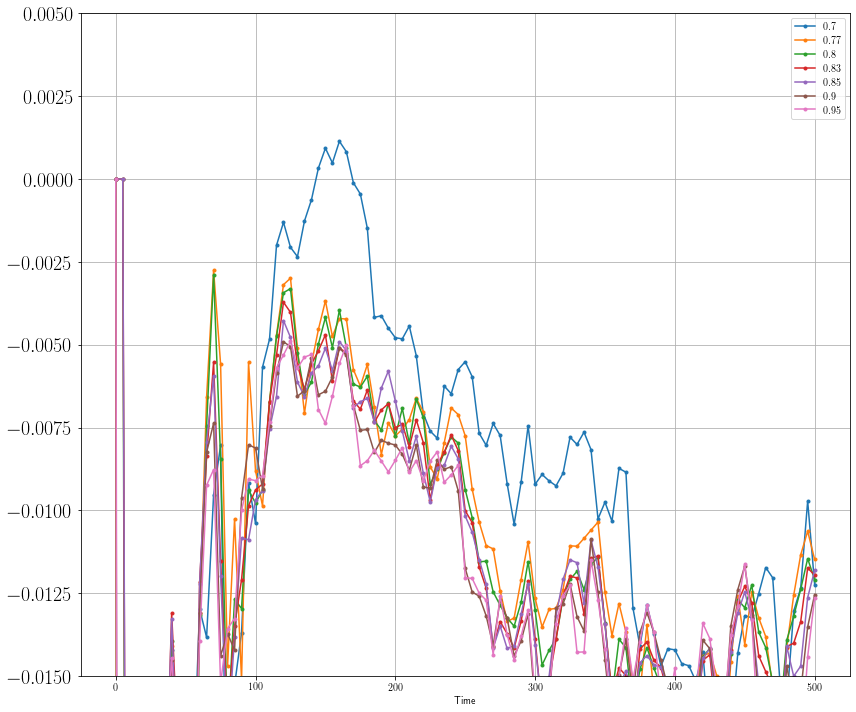

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
        ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
    
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(1):
    ax.set_xlabel('Time')
    ax.legend()
    ax.grid()
    ax.set_ylim(-0.015,0.005)
    ax.tick_params(axis='y', labelsize=20)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


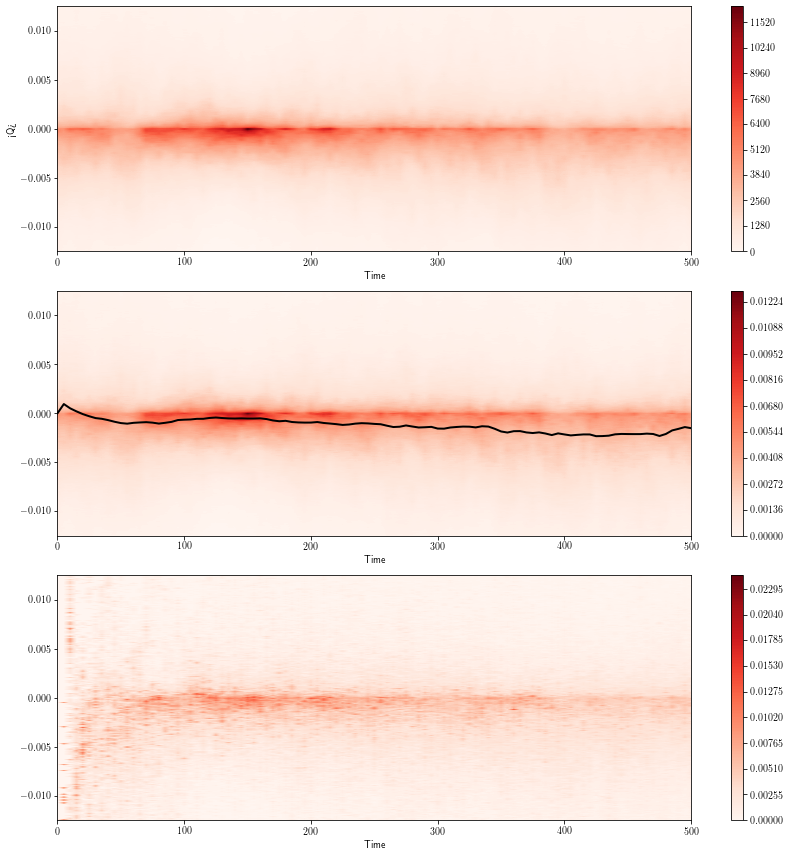

In [9]:
fig,ax = plt.subplots(3,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.7
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))

        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
# ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
p1 = ax[0].contourf(times,Qvals,Q_field_pdf.T,levels=200,cmap = "Reds")
p2 = ax[1].contourf(times,Qvals,Q_particle_pdf.T,levels=200,cmap = "Reds")
ax[1].plot(times,Q_particle_mean,'-',color = 'black',linewidth = 2)
p3 = ax[2].contourf(times,Qvals,Q_caus_pdf.T,levels=200,cmap = "Reds")
fig.colorbar(p1, ax=ax[0], location='right')
fig.colorbar(p2, ax=ax[1], location='right')
fig.colorbar(p3, ax=ax[2], location='right')

# fig.colorbar(p3)
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].set_ylim(-0.0125,0.0125)
ax[0].set_ylabel('<Q>')
    # ax.legend()
    # ax.grid()
    # ax.set_xlim(0,30)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

# fig.savefig(savePlot / 'caustics.png',dpi=300)

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


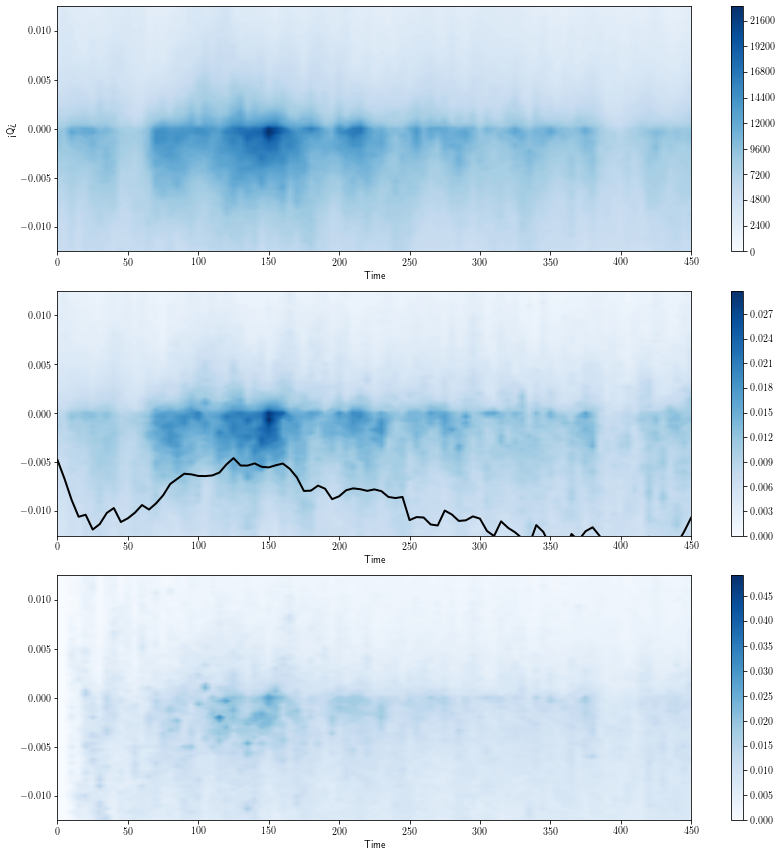

In [14]:
fig,ax = plt.subplots(3,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,600)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.95
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))

        # ax[0].plot(f['times'][:],f['Caustics_ratio'][:]/times,label=f'${alph}$')
        # ax[1].plot(f['times'][:],f['new_caus'][:],label=f'${alph}$')
        # ax[2].plot(f['times'][:],f['same_caus'][:],label=f'${alph}$')
        # ax[3].plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
        # ax.plot(f['times'][:],f['causQmean'][:],'.-',label=f'${alph}$')
# ax.plot(f['times'][:],f['Qmean'][:],'.-',label=f'${alph}$')
p1 = ax[0].contourf(times,Qvals,Q_field_pdf.T,levels=200,cmap = "Blues")
p2 = ax[1].contourf(times,Qvals,Q_particle_pdf.T,levels=200,cmap = "Blues")
ax[1].plot(times,Q_particle_mean,'-',color = 'black',linewidth = 2)
p3 = ax[2].contourf(times,Qvals,Q_caus_pdf.T,levels=200,cmap = "Blues")
fig.colorbar(p1, ax=ax[0], location='right')
fig.colorbar(p2, ax=ax[1], location='right')
fig.colorbar(p3, ax=ax[2], location='right')

# fig.colorbar(p3)
# ax[3].set_xlim(-1e-6,1e-6)
# for i in range(len(ax)):
for i in range(3):
    ax[i].set_xlabel('Time')
    ax[i].set_ylim(-0.0125,0.0125)
ax[0].set_ylabel('<Q>')
    # ax.legend()
    # ax.grid()
    # ax.set_xlim(0,30)
# ax.set_ylabel('N(t)/t')
# ax.set_ylabel('Number of new caustics')
# ax.set_ylabel('Number of same particles causing caustics')
fig.tight_layout()

fig.savefig(savePlot / 'caustics.png',dpi=300)

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


/tmp/ipykernel_23012/3098047887.py:21: RuntimeWarning: invalid value encountered in true_divide
  Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]


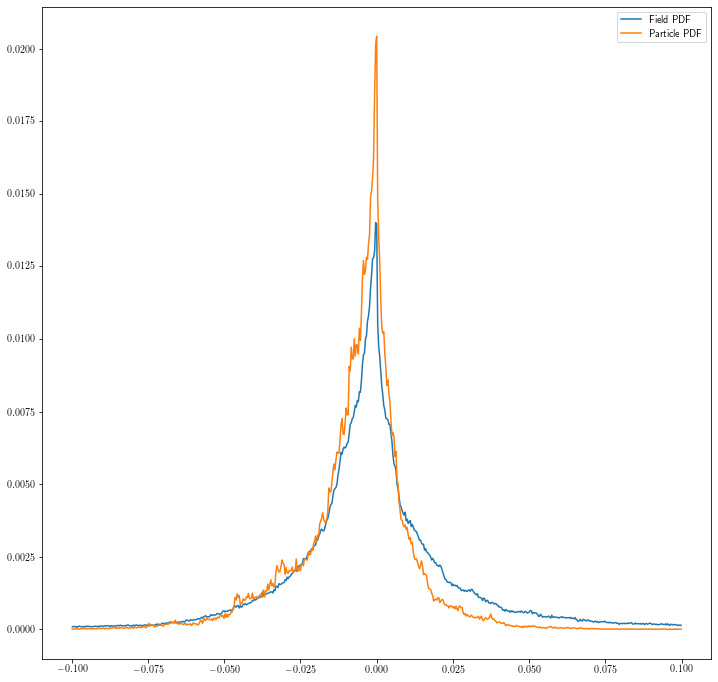

In [35]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,600)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.95
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    time = 150
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_field_pdf = Q_field_pdf / np.sum(Q_field_pdf,axis = 1)[:,None]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_pdf = Q_particle_pdf / np.sum(Q_particle_pdf,axis = 1)[:,None]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]
    Qppdf = Q_particle_pdf[times == time]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
Qpmean = np.sum(Qvals[None,:]*Qppdf[0])
t = 20
Q_heavy = Q_particle_pdf[t]
ax.plot(Qvals,Q_field_pdf[t],label = 'Field PDF')
ax.plot(Qvals,Q_particle_pdf[t],label = 'Particle PDF')
# ax.plot(Qvals,Q_caus_pdf[t],label = 'Caus PDF')
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
ax.legend()

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


/tmp/ipykernel_23012/864085858.py:21: RuntimeWarning: invalid value encountered in true_divide
  Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]


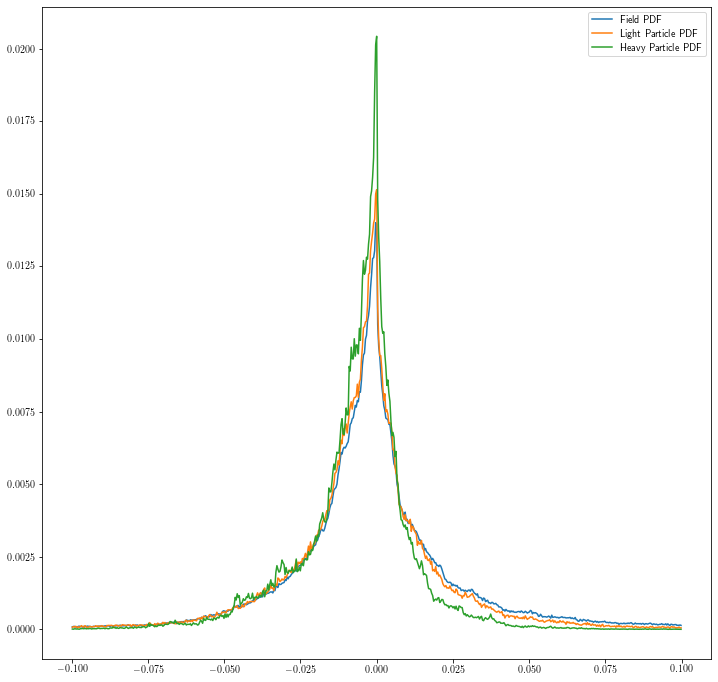

In [36]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,600)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.70
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    time = 150
    Q_field_pdf = f['Q_field_pdf'][:]
    Q_field_pdf = Q_field_pdf / np.sum(Q_field_pdf,axis = 1)[:,None]
    Q_particle_pdf = f['Q_particle_pdf'][:]
    Q_particle_pdf = Q_particle_pdf / np.sum(Q_particle_pdf,axis = 1)[:,None]
    Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
    Q_caus_pdf = f['Q_caus_pdf'][:]
    Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]
    Qppdf = Q_particle_pdf[times == time]
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
Qpmean = np.sum(Qvals[None,:]*Qppdf[0])
t = 20
Q_light = Q_particle_pdf[t]
ax.plot(Qvals,Q_field_pdf[t],label = 'Field PDF')
ax.plot(Qvals,Q_particle_pdf[t],label = 'Light Particle PDF')
ax.plot(Qvals,Q_heavy,label = 'Heavy Particle PDF')

# ax.plot(Qvals,Q_caus_pdf[t],label = 'Caus PDF')
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
ax.legend()

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


/tmp/ipykernel_23012/2961668642.py:22: RuntimeWarning: divide by zero encountered in log10
  p2 = ax.contourf(times - times[-1],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=200,cmap = "Reds")


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12583563,  0.        , -0.0836622 , ..., -0.0673988 ,
         0.        , -0.17039629],
       [-0.41774212,  0.03730049, -0.12215289, ..., -0.12339981,
        -0.01752966, -0.05236947],
       [-0.10240692, -0.10179643, -0.06443253, ..., -0.14585875,
        -0.15693726, -0.11590983]])

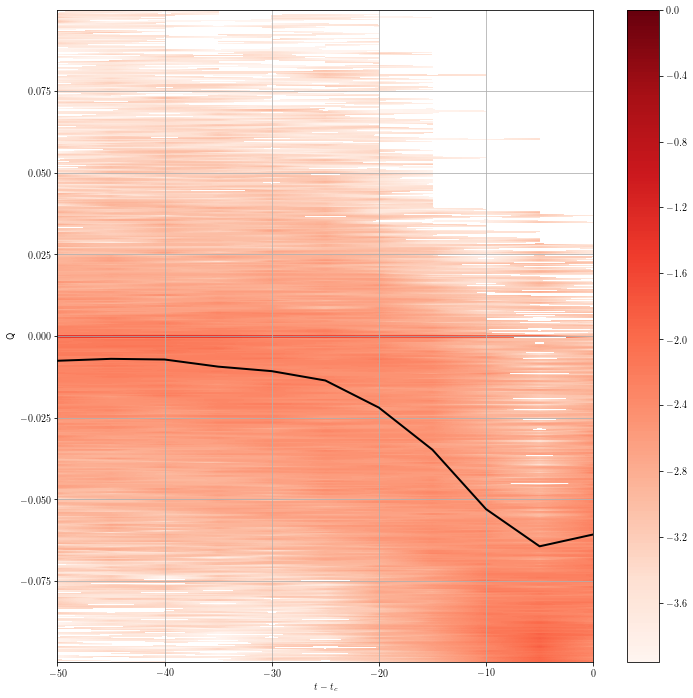

In [24]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,601)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.7
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_caus_shifted = f['Q_caus_shifted'][:]

Q_caus_shifted_pdf = np.zeros((len(times),len(Qvals)))
for i,time in enumerate(times):
    Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Qbins)[0]
Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
Q_caus_shifted_mean = np.sum(Qvals[None,:]*Q_caus_shifted_pdf,axis = 1)
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
p2 = ax.contourf(times - times[-1],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=200,cmap = "Reds")
ax.set_xlim(-50,0)
ax.grid()
fig.colorbar(p2, ax=ax, location='right')
ax.plot(times - times[-1],Q_caus_shifted_mean,'-',color = 'black',linewidth = 2)
ax.set_xlabel('$t-t_c$')
ax.set_ylabel('Q')

# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
Q_caus_shifted

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


/tmp/ipykernel_23012/1759233630.py:22: RuntimeWarning: divide by zero encountered in log10
  p2 = ax.contourf(times - times[-1],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=200,cmap = "Blues")


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05358873, -0.03763921, -0.05186397, ..., -0.03536939,
        -0.05021715, -0.01922224],
       [-0.07368975, -0.08895824, -0.08920069, ..., -0.09578202,
        -0.08458057, -0.05653119],
       [-0.0704266 , -0.10167771, -0.03373464, ..., -0.03710472,
        -0.06154657, -0.09680673]])

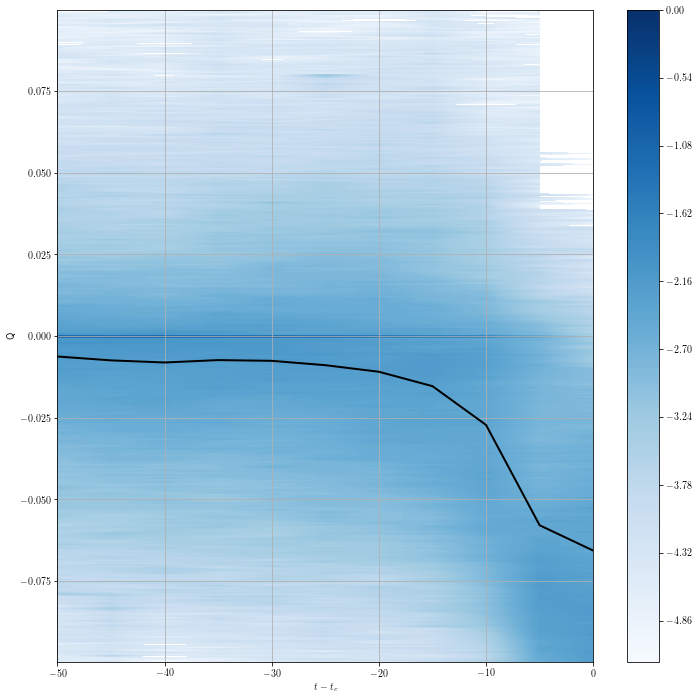

In [25]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qbins = np.linspace(-0.1,0.1,601)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])

# for alph in alpha_values:
alph = 0.95
loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
    print(f.keys())
    # print(f['Qmean'][:])
    times = f['times'][:]
    Q_caus_shifted = f['Q_caus_shifted'][:]

Q_caus_shifted_pdf = np.zeros((len(times),len(Qvals)))
for i,time in enumerate(times):
    Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Qbins)[0]
Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
Q_caus_shifted_mean = np.sum(Qvals[None,:]*Q_caus_shifted_pdf,axis = 1)
    # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
p2 = ax.contourf(times - times[-1],Qvals,np.log10(Q_caus_shifted_pdf).T,levels=200,cmap = "Blues")
ax.grid()
ax.set_xlim(-50,0)
fig.colorbar(p2, ax=ax, location='right')
ax.plot(times - times[-1],Q_caus_shifted_mean,'-',color = 'black',linewidth = 2)
ax.set_xlabel('$t-t_c$')
ax.set_ylabel('Q')
# ax.axvline(x=Qpmean, color='red', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125Q_caus_shifted

# Qpdfs
## Time averaged pdf of Qfield. 
## Time averaged pdf of the particles for 2 different density ratio. 
## Pdf of where causitcs formed.
## Pdf where the caustics was triggered. 

For $\alpha = 0.7, 0.8$

<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>
Field_mean : -1.2888117765248036e-06, Particle_mean : -0.006183179712101016
<KeysViewHDF5 ['Caustics_ratio', 'Q_caus_pdf', 'Q_caus_shifted', 'Q_field_pdf', 'Q_particle_pdf', 'Qmean', 'Qstd', 'causQmean', 'causQstd', 'new_caus', 'same_caus', 'times']>


/tmp/ipykernel_24915/764932802.py:27: RuntimeWarning: invalid value encountered in true_divide
  Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]


Field_mean : -1.2888117765248036e-06, Particle_mean : -0.010620886752345255


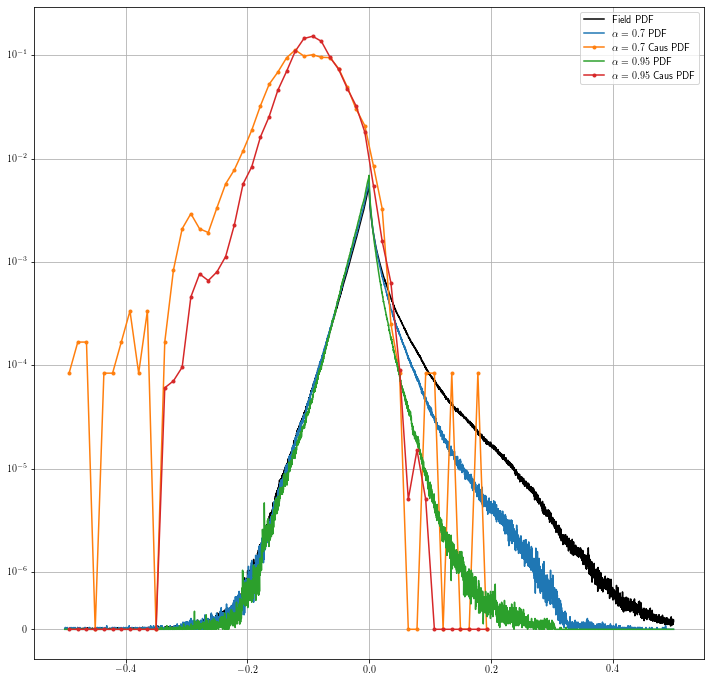

In [32]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
Qmax = 0.5
Qmin = -0.5
Qbins = np.linspace(Qmin,Qmax, 6001)
Qvals = 0.5*(Qbins[1:]+Qbins[:-1])


Q1bins = np.linspace(-0.5,0.2, 50)
Q1vals = 0.5*(Q1bins[1:]+Q1bins[:-1])
alpha_values = [0.7,0.95]
# t_avg_Qpdf_field = [] 
for alph in alpha_values:
    loadPath = pathlib.Path(f"/home/rajarshi.chattopadhyay/fluid/2DV_and_particles/data/Re_{np.round(Re,2)},dt_{dt},N_{N}/alpha_{alph:.2}_prtcl/St_{st}/")
    with h5py.File(loadPath / f"caus-details.hdf5",'r') as f:
        print(f.keys())
        # print(f['Qmean'][:])
        times = f['times'][:]
        time = 150
        Q_field_pdf = f['Q_field_pdf'][:]
        Q_field_pdf = Q_field_pdf / np.sum(Q_field_pdf,axis = 1)[:,None]
        Q_particle_pdf = f['Q_particle_pdf'][:]
        Q_particle_pdf = Q_particle_pdf / np.sum(Q_particle_pdf,axis = 1)[:,None]
        Q_particle_mean = np.sum(Qvals[None,:]*Q_particle_pdf,axis = 1)
        Q_caus_pdf = f['Q_caus_pdf'][:]
        Q_caus_pdf = Q_caus_pdf / np.sum(Q_caus_pdf,axis = 1)[:,None]
        Qppdf = Q_particle_pdf[times == time]
        Q_caus_shifted = f['Q_caus_shifted'][:]
        # print(np.sum(Q_particle_pdf,axis = 1),np.sum(Q_field_pdf,axis = 1),np.sum(Q_caus_pdf,axis = 1))
    Qpmean = np.sum(Qvals[None,:]*Qppdf[0])
    time_averaged_Qpdf_field = np.sum(Q_field_pdf,axis = 0)/len(times)
    time_averaged_Qpdf_particle = np.sum(Q_particle_pdf,axis = 0)/len(times)
    field_mean = np.sum(Qvals*time_averaged_Qpdf_field)
    particle_mean = np.sum(Qvals*time_averaged_Qpdf_particle)
    print(f"Field_mean : {field_mean}, Particle_mean : {particle_mean}")
    Q_caus_shifted_pdf = np.zeros((len(times),len(Q1vals)))
    for i,time in enumerate(times):
        # print(np.histogram(Q_caus_shifted[i],bins = Q1bins)[0].shape)
        Q_caus_shifted_pdf[i] = np.histogram(Q_caus_shifted[i],bins = Q1bins)[0]
    Q_caus_shifted_pdf = Q_caus_shifted_pdf/np.sum(Q_caus_shifted_pdf,axis = 1)[:,None]
    Q_caus_shifted_mean = np.sum(Q1vals[None,:]*Q_caus_shifted_pdf,axis = 1)



    
    if alph == 0.7: ax.plot(Qvals,time_averaged_Qpdf_field,label = 'Field PDF',color = "black")
    
    ax.plot(Qvals,time_averaged_Qpdf_particle,label = fr'$\alpha = {alph}$ PDF')
    ax.plot(Q1vals, Q_caus_shifted_pdf[-1],'.-',label = fr'$\alpha = {alph}$ Caus PDF')
# ax.plot(Qvals,Q_caus_pdf[t],label = 'Caus PDF')
    # ax.axvline(x=field_mean, color='red', linestyle='--', label='Qmean')
    # ax.axvline(x=particle_mean, color='green', linestyle='--', label='Qpmean')
# ax.set_xlim(-0.0125,0.0125)
# ax.set_xlim(-0.0125,0.0125)
ax.set_yscale('symlog',linthresh = 1e-6, linscale = 0.5)
# ax.set_xscale('symlog',linthresh = 1e-3, linscale = 1.0,base = 2)
ax.grid()
ax.legend()